# Census Income Project

Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



To download the dataset, use the link given below. 

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
data.shape

(32560, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.shape

(32536, 15)

In [8]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Lets check what kind of data each set contains 

In [9]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [10]:
data.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [11]:
data['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

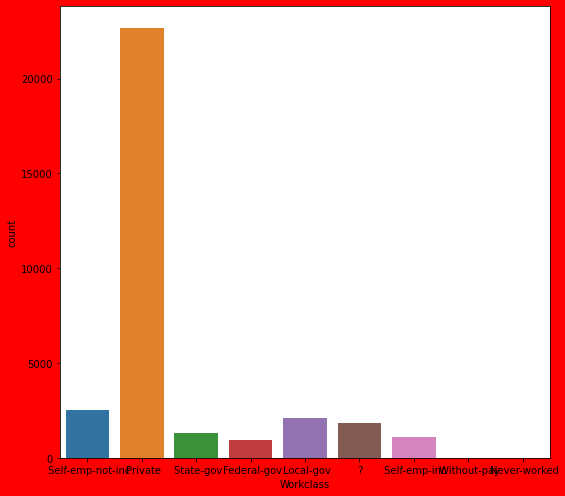

In [12]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['Workclass']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Workclass'])
    plotnumber += 1
plt.tight_layout()

In [13]:
data['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

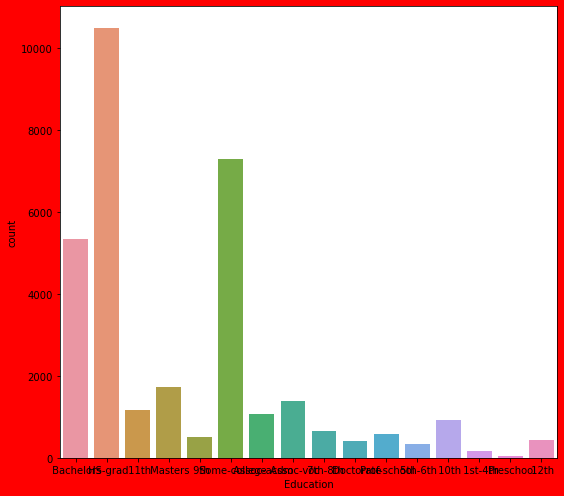

In [14]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['Education']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Education'])
    plotnumber += 1
plt.tight_layout()

In [15]:
data['Education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

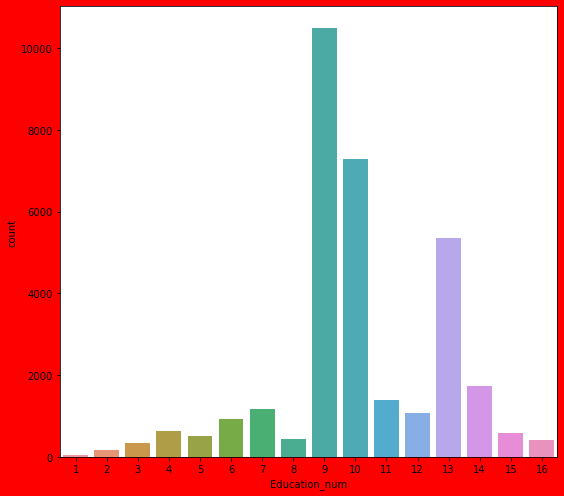

In [16]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['Education_num']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Education_num'])
    plotnumber += 1
plt.tight_layout()

In [17]:
data['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

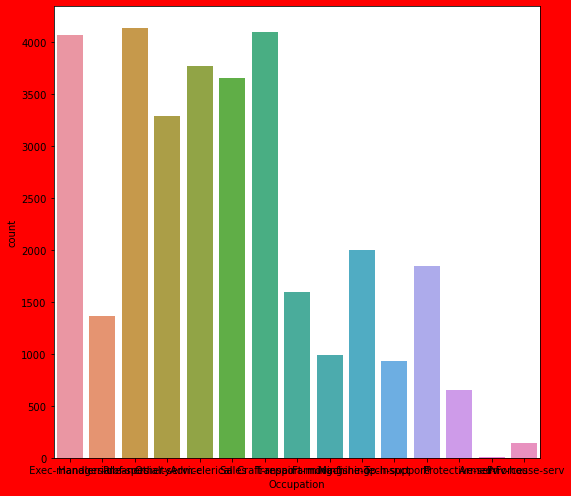

In [18]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['Occupation']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Occupation'])
    plotnumber += 1
plt.tight_layout()

In [19]:
data['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

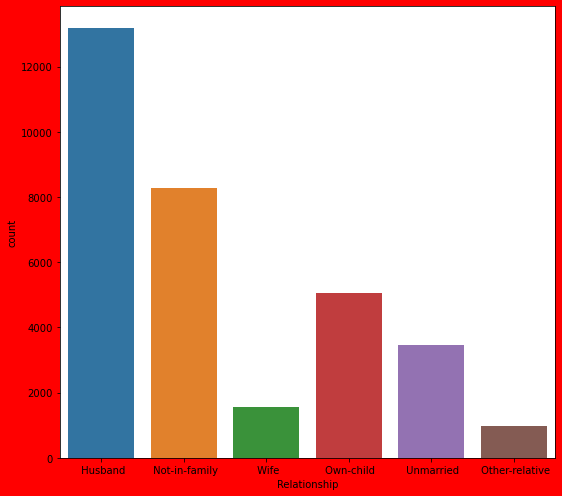

In [20]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['Relationship']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Relationship'])
    plotnumber += 1
plt.tight_layout()

In [21]:
data['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

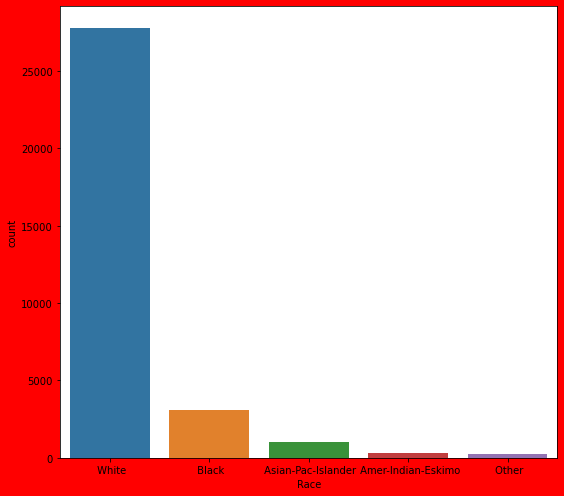

In [22]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['Race']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Race'])
    plotnumber += 1
plt.tight_layout()

In [23]:
data['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

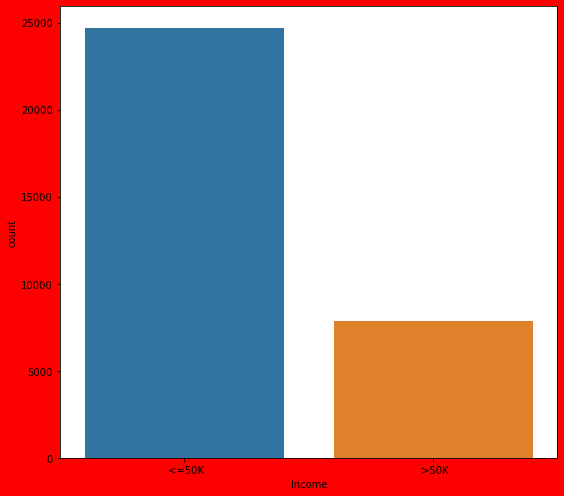

In [24]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['Income']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Income'])
    plotnumber += 1
plt.tight_layout()

In [25]:
data['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [26]:
data['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

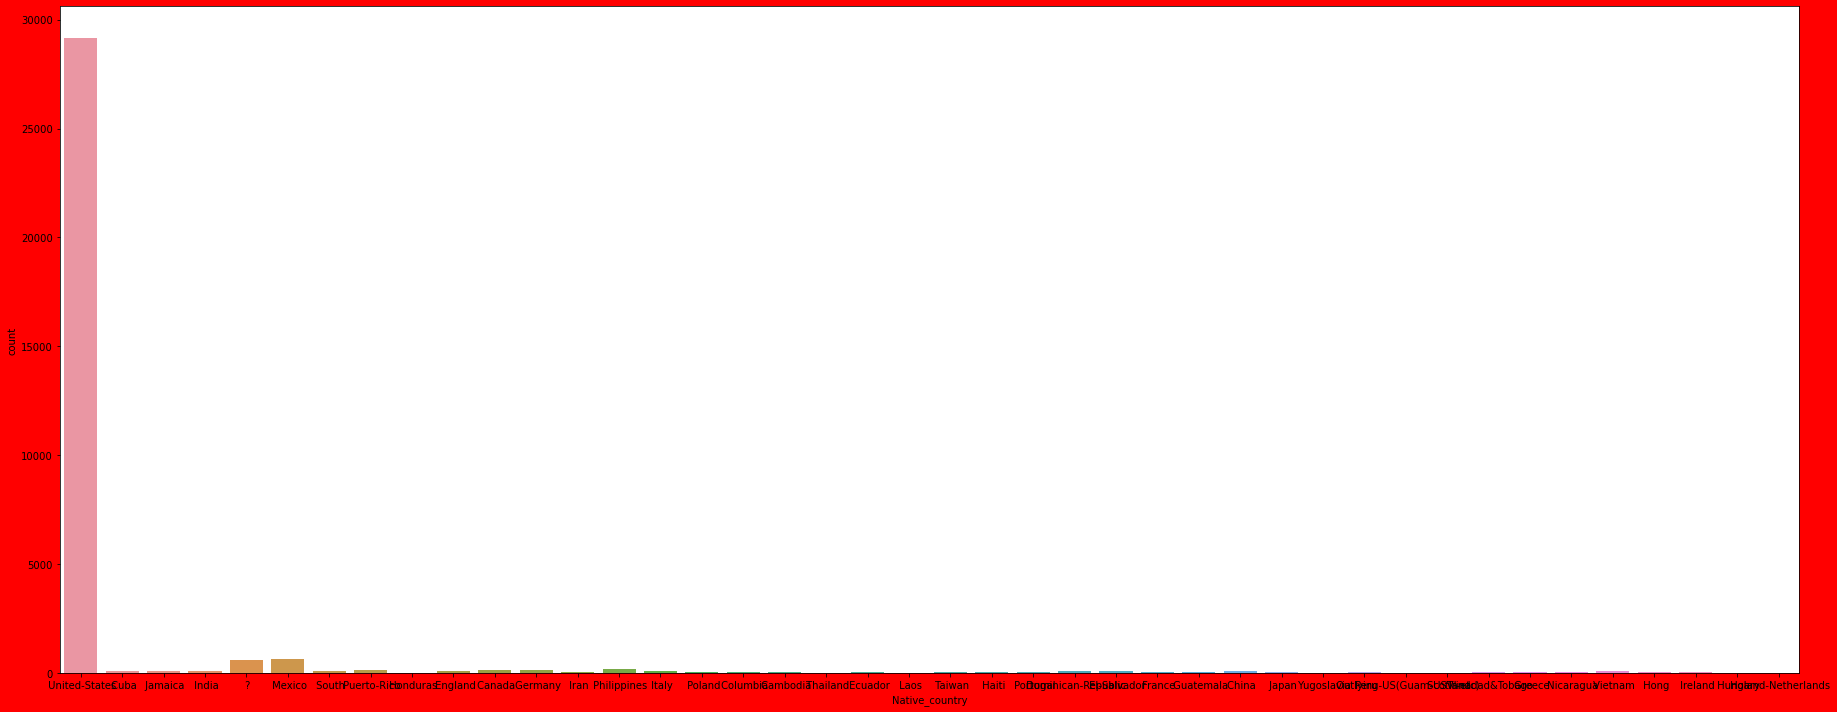

In [27]:
plt.figure(figsize = (50,10), facecolor = 'red')
plotnumber = 1

for column in data['Native_country']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Native_country'])
    plotnumber += 1
plt.tight_layout()

United states has the heighgest number of citizens 

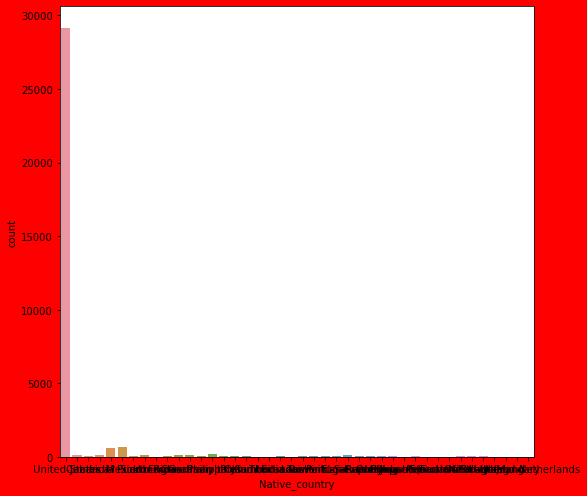

In [28]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['Native_country']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Native_country'])
    plotnumber += 1
plt.tight_layout()

In [29]:
data.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

workclass, occupation and native country has null values in the form of '?'

# Lets check the data of int type 

Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week

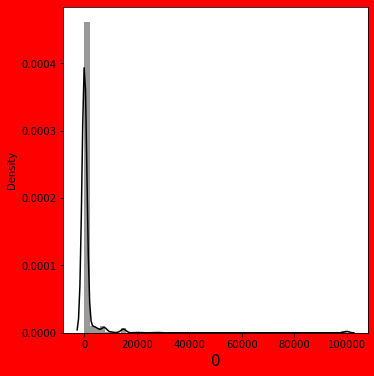

In [30]:
plt.figure(figsize = (12,6), facecolor = 'red')
plotnumber = 1

for column in data['Capital_gain']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.distplot(data['Capital_gain'], color = 'black')
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.show()

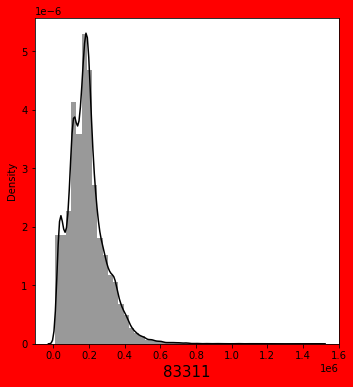

In [31]:
plt.figure(figsize = (12,6), facecolor = 'red')
plotnumber = 1

for column in data['Fnlwgt']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.distplot(data['Fnlwgt'], color = 'black')
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.show()

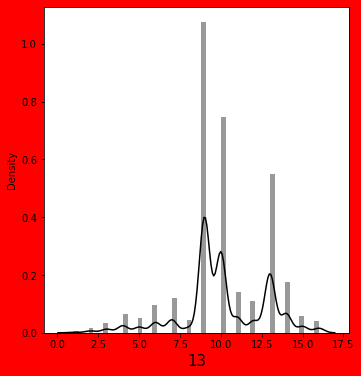

In [32]:
plt.figure(figsize = (12,6), facecolor = 'red')
plotnumber = 1

for column in data['Education_num']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.distplot(data['Education_num'], color = 'black')
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.show()

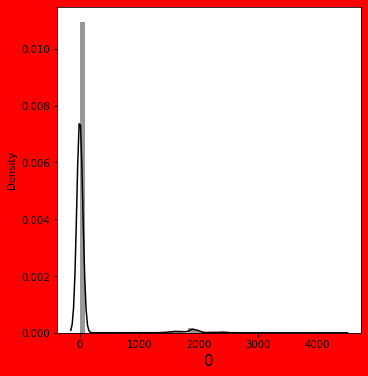

In [33]:
plt.figure(figsize = (12,6), facecolor = 'red')
plotnumber = 1

for column in data['Capital_loss']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.distplot(data['Capital_loss'], color = 'black')
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.show()

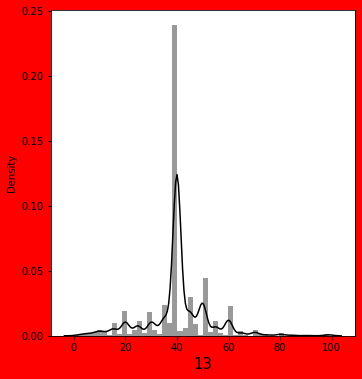

In [34]:
plt.figure(figsize = (12,6), facecolor = 'red')
plotnumber = 1

for column in data['Hours_per_week']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.distplot(data['Hours_per_week'], color = 'black')
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.show()

Now lets fill value of nan i.e '?'

In [35]:
data.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

In [36]:
data=data.replace(" ?",np.nan)

In [37]:
data.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

now lets fill the nan values using mode as data is note continous 

In [38]:
data['Workclass'].fillna(data['Workclass'].mode()[0],inplace=True)
data['Occupation'].fillna(data['Occupation'].mode()[0],inplace=True)
data['Native_country'].fillna(data['Native_country'].mode()[0],inplace=True)

In [39]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

So everthing is filled noe data is 
kinda clear then before 

lets check the data types 

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.0+ MB


lets convert object data type to integer by ordinal encoder 

In [41]:
data['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [42]:
ord_enc=OrdinalEncoder(categories=[[' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked']])
df1=ord_enc.fit_transform(data[['Workclass']])
print(df1)
data['Workclass']=df1

[[0.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [5.]]


In [43]:
data['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [44]:
ord_enc=OrdinalEncoder(categories=[[' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th']])
df1=ord_enc.fit_transform(data[['Education']])
print(df1)
data['Education']=df1

[[0.]
 [1.]
 [2.]
 ...
 [1.]
 [1.]
 [1.]]


In [45]:
data['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [46]:
ord_enc=OrdinalEncoder(categories=[[' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed']])
df1=ord_enc.fit_transform(data[['Marital_status']])
print(df1)
data['Marital_status']=df1

[[0.]
 [1.]
 [0.]
 ...
 [6.]
 [3.]
 [0.]]


In [47]:
data['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [48]:
ord_enc=OrdinalEncoder(categories=[[' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv']])
df1=ord_enc.fit_transform(data[['Occupation']])
print(df1)
data['Occupation']=df1

[[0.]
 [1.]
 [1.]
 ...
 [4.]
 [4.]
 [0.]]


In [49]:
data['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [50]:
ord_enc=OrdinalEncoder(categories=[[' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative']])
df1=ord_enc.fit_transform(data[['Relationship']])
print(df1)
data['Relationship']=df1

[[0.]
 [1.]
 [0.]
 ...
 [4.]
 [3.]
 [2.]]


In [51]:
data['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [52]:
ord_enc=OrdinalEncoder(categories=[[' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other']])
df1=ord_enc.fit_transform(data[['Race']])
print(df1)
data['Race']=df1

[[0.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


In [53]:
data['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [54]:
ord_enc=OrdinalEncoder(categories=[[' Male', ' Female']])
df1=ord_enc.fit_transform(data[['Sex']])
print(df1)
data['Sex']=df1

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [1.]]


In [55]:
data['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [56]:
ord_enc=OrdinalEncoder(categories=[[' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands']])
df1=ord_enc.fit_transform(data[['Native_country']])
print(df1)
data['Native_country']=df1

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [57]:
data['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [58]:
ord_enc=OrdinalEncoder(categories=[[' <=50K', ' >50K']])
df1=ord_enc.fit_transform(data[['Income']])
print(df1)
data['Income']=df1

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32536 non-null  int64  
 1   Workclass       32536 non-null  float64
 2   Fnlwgt          32536 non-null  int64  
 3   Education       32536 non-null  float64
 4   Education_num   32536 non-null  int64  
 5   Marital_status  32536 non-null  float64
 6   Occupation      32536 non-null  float64
 7   Relationship    32536 non-null  float64
 8   Race            32536 non-null  float64
 9   Sex             32536 non-null  float64
 10  Capital_gain    32536 non-null  int64  
 11  Capital_loss    32536 non-null  int64  
 12  Hours_per_week  32536 non-null  int64  
 13  Native_country  32536 non-null  float64
 14  Income          32536 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 5.0 MB


In [60]:
data['Workclass'] = data['Workclass'].astype(int)
data['Education'] = data['Education'].astype(int)
data['Marital_status'] = data['Marital_status'].astype(int)
data['Occupation'] = data['Occupation'].astype(int)
data['Relationship'] = data['Relationship'].astype(int)
data['Race'] = data['Race'].astype(int)
data['Sex'] = data['Sex'].astype(int)
data['Native_country'] = data['Native_country'].astype(int)
data['Income'] = data['Income'].astype(int)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32536 non-null  int64
 1   Workclass       32536 non-null  int32
 2   Fnlwgt          32536 non-null  int64
 3   Education       32536 non-null  int32
 4   Education_num   32536 non-null  int64
 5   Marital_status  32536 non-null  int32
 6   Occupation      32536 non-null  int32
 7   Relationship    32536 non-null  int32
 8   Race            32536 non-null  int32
 9   Sex             32536 non-null  int32
 10  Capital_gain    32536 non-null  int64
 11  Capital_loss    32536 non-null  int64
 12  Hours_per_week  32536 non-null  int64
 13  Native_country  32536 non-null  int32
 14  Income          32536 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 3.9 MB


everthing is converted into integer

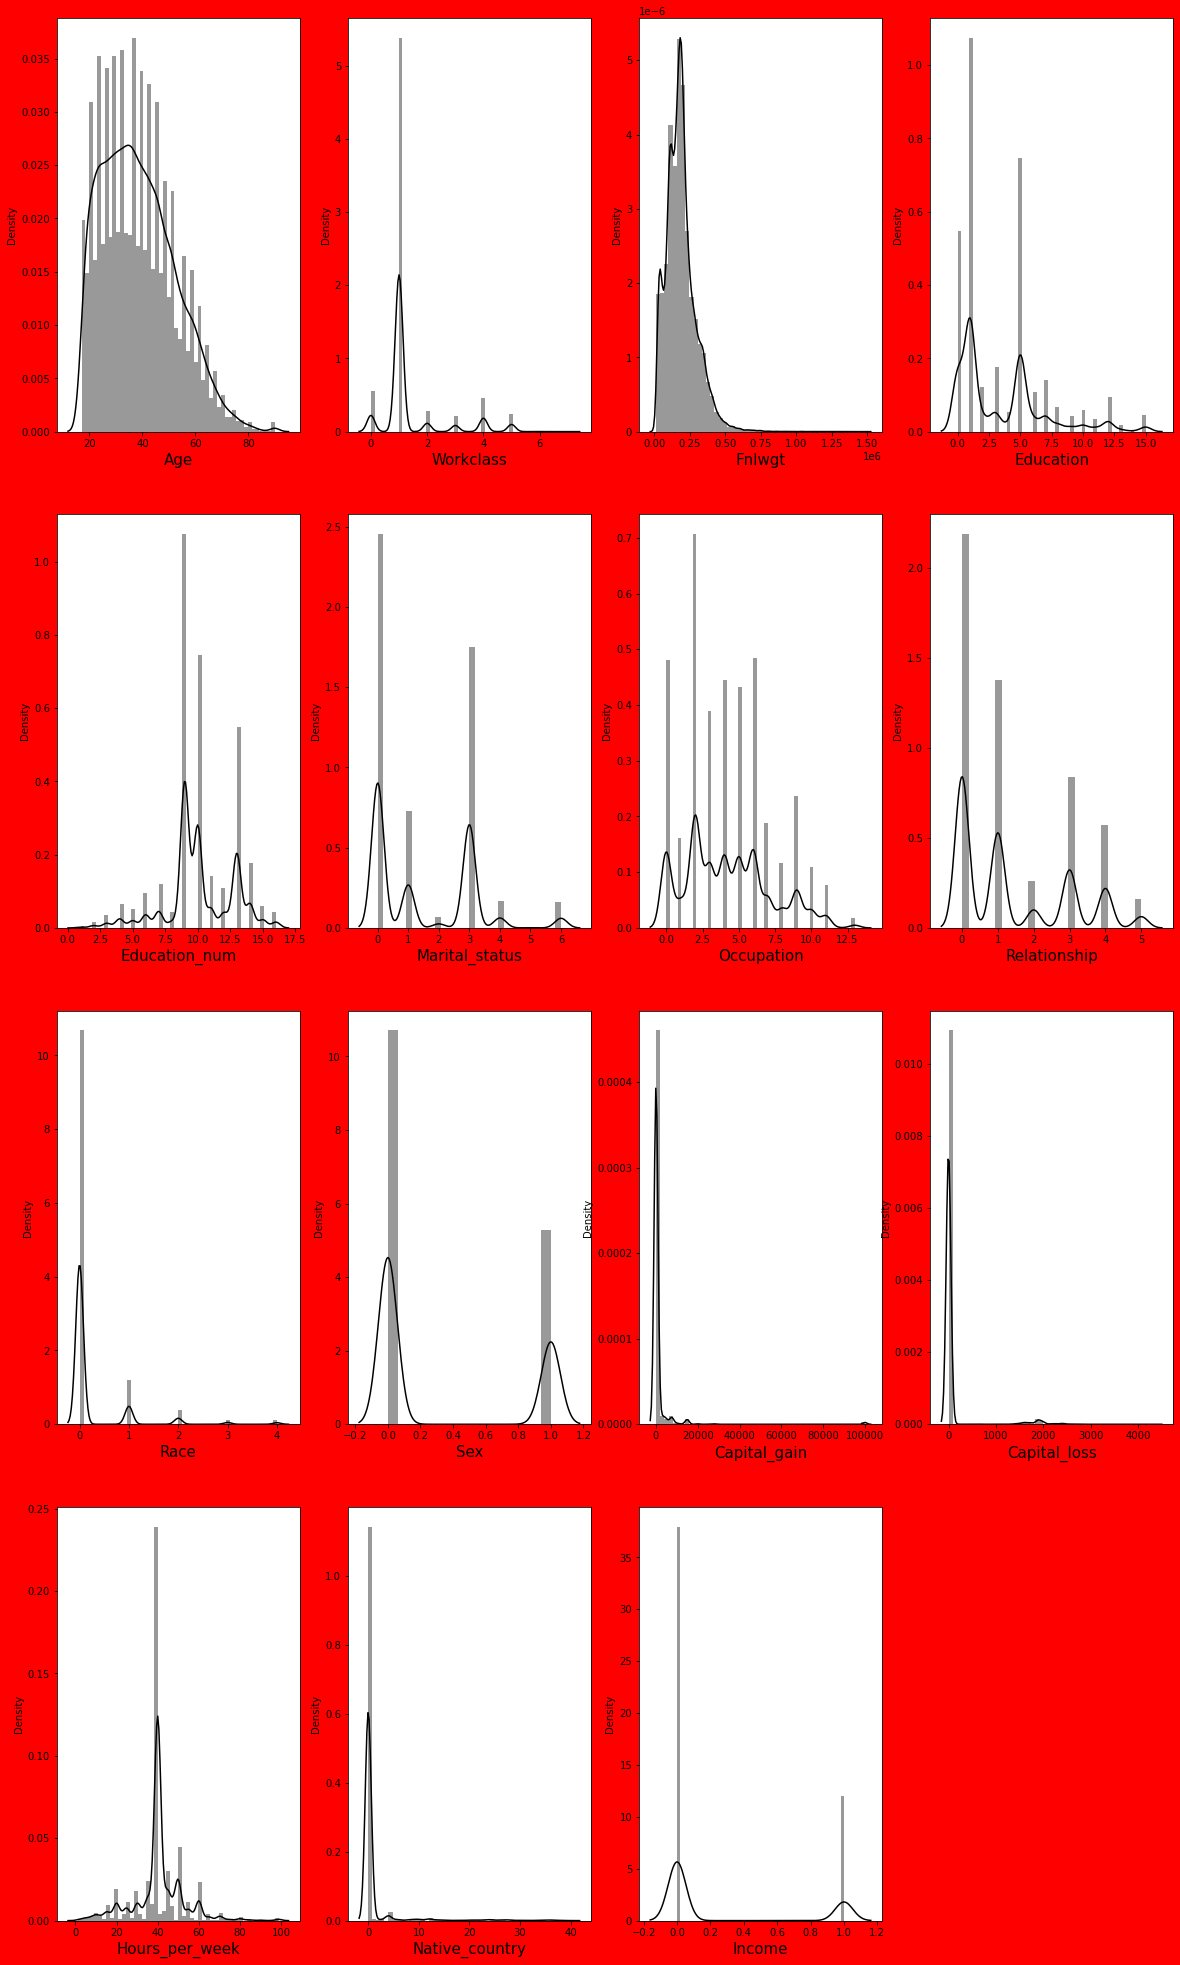

In [62]:
plt.figure(figsize = (20,35), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

In [63]:
data.skew()

Age                0.557657
Workclass          2.023012
Fnlwgt             1.447695
Education          1.231594
Education_num     -0.309454
Marital_status     0.742630
Occupation         0.497266
Relationship       0.784862
Race               3.520243
Sex                0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country     5.126606
Income             1.211640
dtype: float64

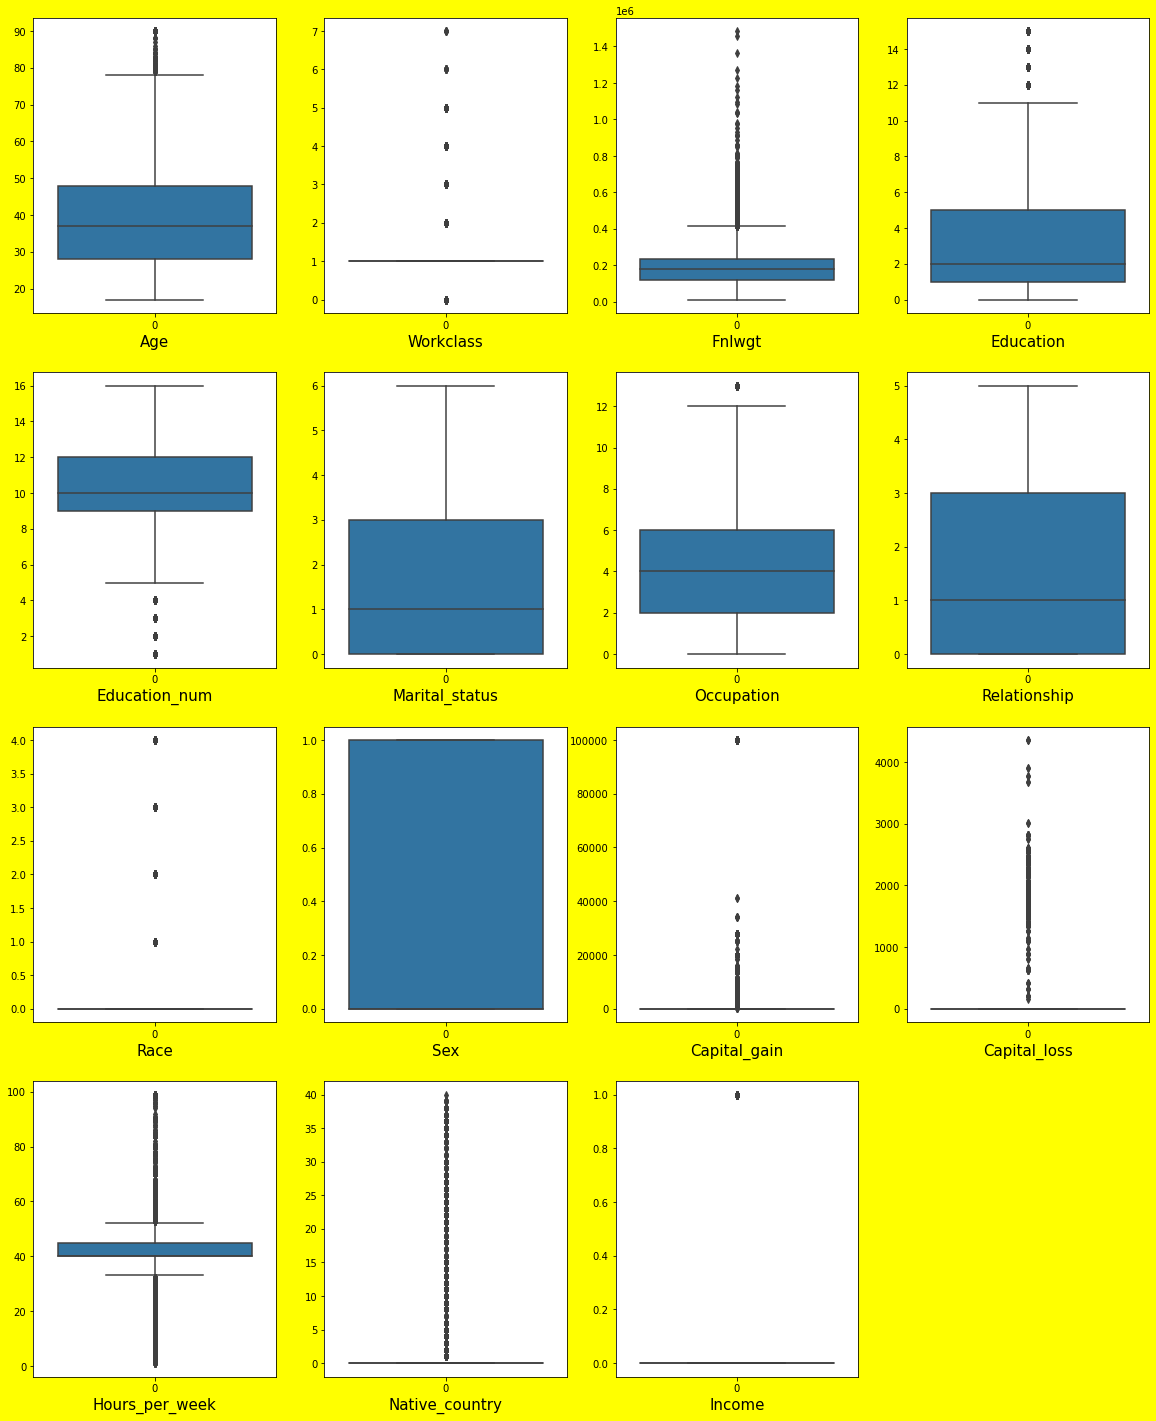

In [64]:
plt.figure(figsize=(20,25),facecolor='yellow')
graph=1
for column in data:
    if graph<=16:
        plt.subplot(4,4,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

Here we cant remove the outliers as the data is discrete its no where continous other than Fnlwgt

In [65]:
data.skew()

Age                0.557657
Workclass          2.023012
Fnlwgt             1.447695
Education          1.231594
Education_num     -0.309454
Marital_status     0.742630
Occupation         0.497266
Relationship       0.784862
Race               3.520243
Sex                0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country     5.126606
Income             1.211640
dtype: float64

In [66]:
scaler=PowerTransformer(method='yeo-johnson')

In [67]:
data[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']] = scaler.fit_transform(data[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']].values)

We have removed skweness

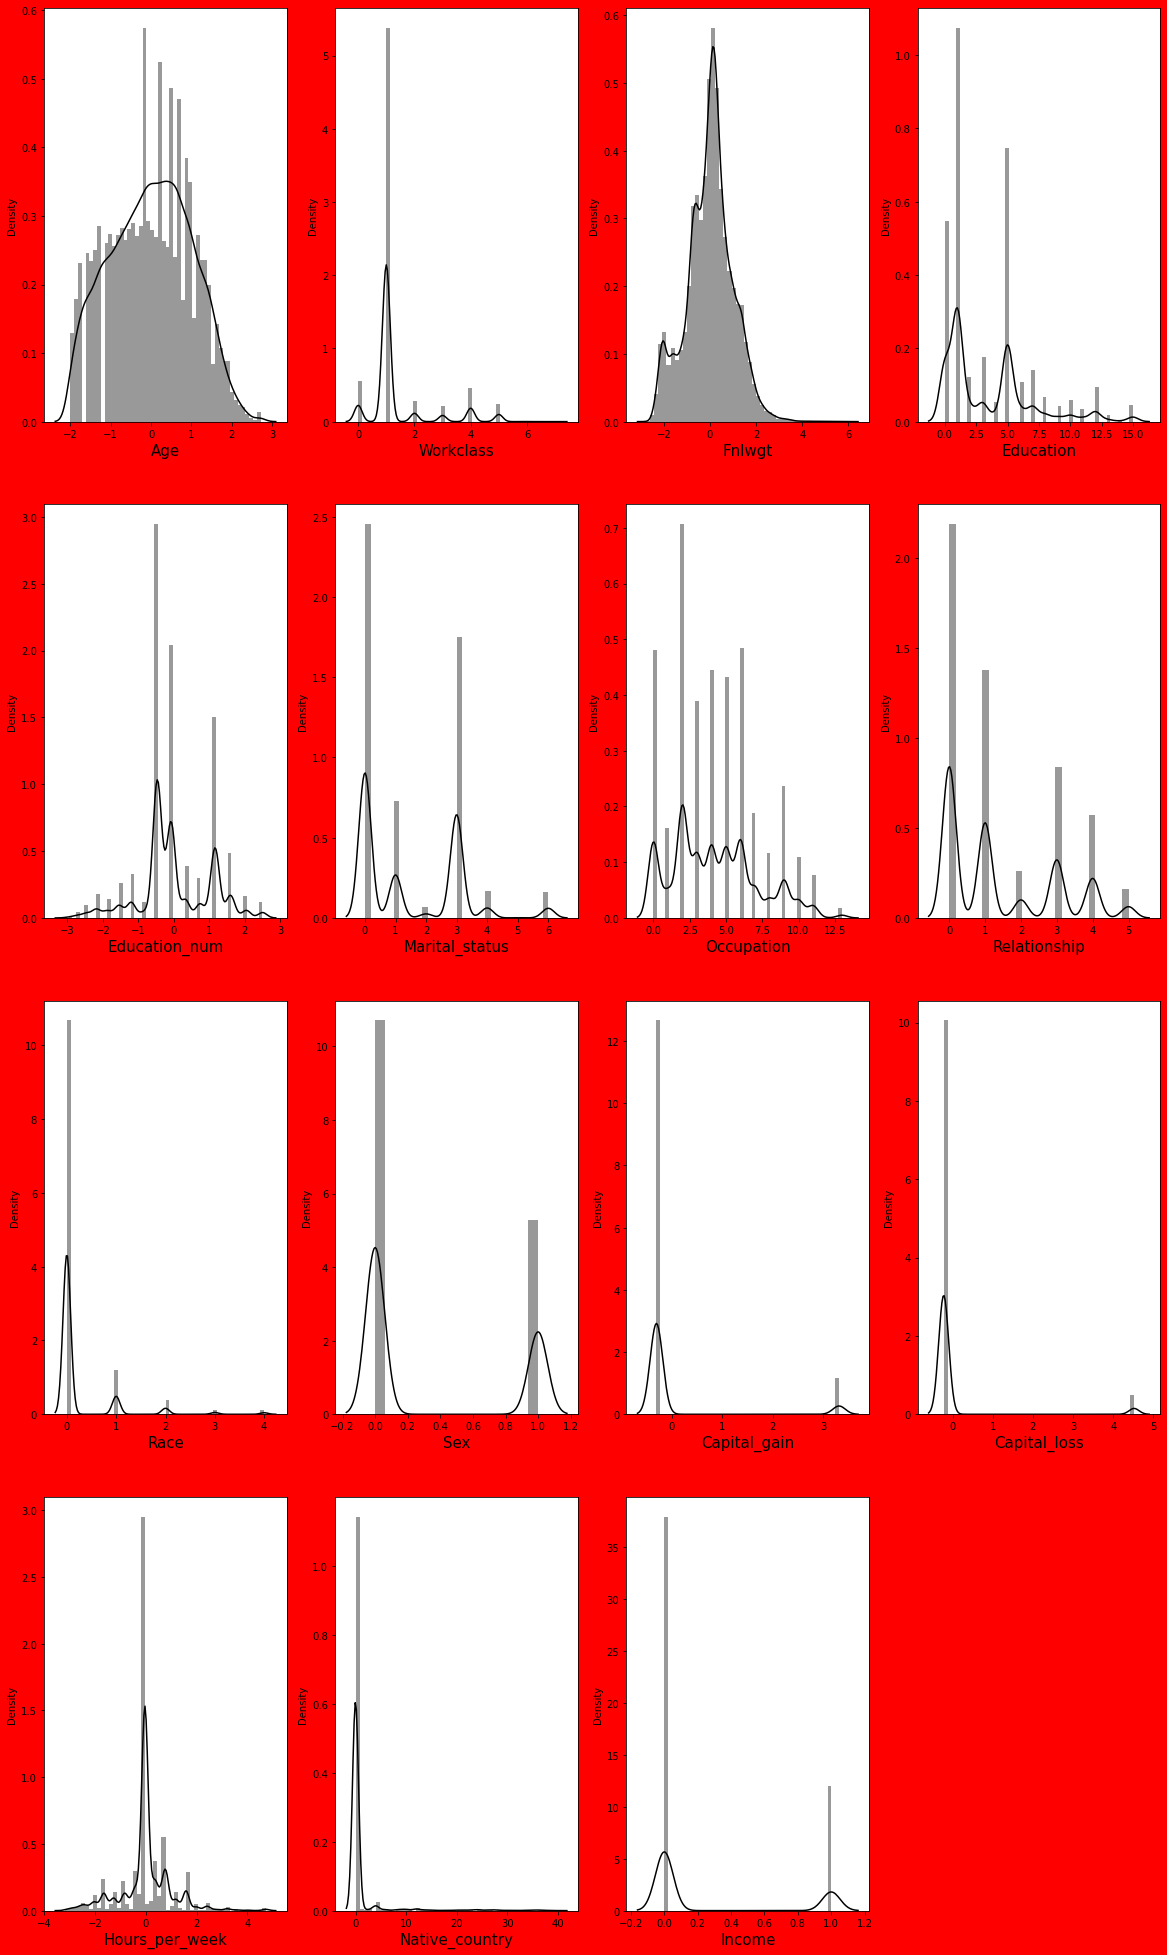

In [68]:
plt.figure(figsize = (20,35), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

Now data looks kinda better 

In [69]:
scaler=StandardScaler()
X=data.drop('Income',axis=1)

In [70]:
x = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [71]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif['Features']=x.columns
vif

,vif,Features
0,1.191109,Age
1,1.034648,Workclass
2,1.008897,Fnlwgt
3,1.072396,Education
4,1.239610,Education_num
5,1.564893,Marital_status
6,1.101926,Occupation
7,1.840723,Relationship
8,1.071690,Race
9,1.390503,Sex


We dont see VIF value more than 5 

In [72]:
scaler=StandardScaler()
X=data.drop('Income',axis=1)
X_scaled=scaler.fit_transform(X)

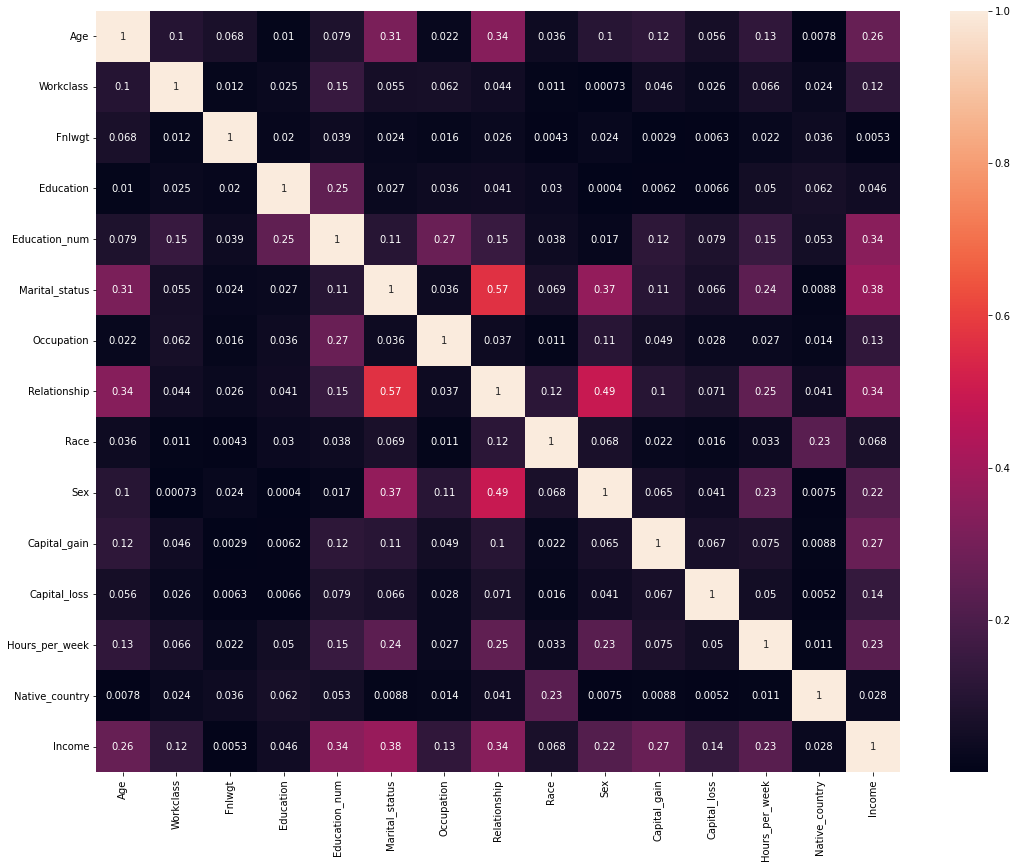

In [73]:
data_corr=data.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(data_corr,annot=True, annot_kws={'size':10})
plt.show()

# PCA

In [74]:
pca=PCA()
pca.fit_transform(X_scaled)

array([[-1.0079035 , -1.12399963, -0.47182294, ...,  0.26837146,
         0.34826828,  0.32901026],
       [-0.47828727, -0.16643205, -0.46369306, ..., -1.10618851,
         0.04413783,  0.13587692],
       [-1.07079961,  0.66245442,  0.70804684, ..., -1.43913415,
        -0.1590801 , -0.10836149],
       ...,
       [ 2.47246672, -0.98918352, -0.45757   , ..., -0.73531486,
         1.65661519, -0.22201314],
       [ 1.79790462,  0.08002065, -0.97563172, ..., -0.51871829,
         0.49543809,  0.47732298],
       [-0.79920512, -2.37045273,  0.96627973, ..., -1.68422349,
        -1.52152573,  0.10877   ]])

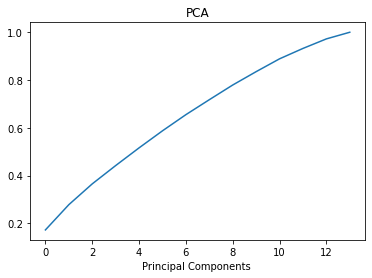

In [75]:
#lets plot scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))#cumsum=cummulative summention
plt.xlabel('Principal Components ')
plt.title('PCA')
plt.show()
#explained_variance_ratio_ = how much data variance u can explain if ur using on component 
#cumsum = it will increase its value by adding one + another data then another and so on 

we can get 95% at 11

In [76]:
pca=PCA(n_components=11)
new_pcomp=pca.fit_transform(X_scaled)
princi_comp=pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.007903,-1.124000,-0.471823,-0.063301,0.437527,-0.945583,-2.236685,-1.762770,-1.252285,-1.275033,-0.096681
1,-0.478287,-0.166432,-0.463693,0.187856,-0.531602,0.165046,-0.575328,-0.329809,-0.781600,-0.015492,-0.110254
2,-1.070800,0.662454,0.708047,0.009984,-0.090834,0.181984,-0.584402,-0.988427,-0.859042,0.253780,-1.359693
3,0.594414,-1.350405,0.848798,0.648979,-1.447078,0.221558,-0.263425,-0.644614,-0.287088,0.483707,-1.000295
4,0.107160,-1.853333,-0.020432,0.068734,-0.509759,0.870574,-0.867582,-0.356136,-0.707905,0.921103,-0.154540
...,...,...,...,...,...,...,...,...,...,...,...
32531,0.661790,0.702767,-0.627543,0.066487,-0.402872,0.213782,0.624412,-0.171797,0.564696,0.423159,0.125978
32532,-1.206597,1.309830,-0.797606,0.256361,-0.290524,-0.975259,0.505667,-0.808752,0.206316,-0.196093,0.138825
32533,2.472467,-0.989184,-0.457570,-0.364524,0.606518,-0.495309,0.222819,-0.703643,0.761360,1.767447,0.281521
32534,1.797905,0.080021,-0.975632,0.303656,-0.834501,-0.101386,-0.174930,-0.396900,-0.296165,-1.499110,0.181462


In [77]:
y=data['Income']

In [78]:
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.25,random_state=355)

In [79]:
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('\n===============Train Reasult=============')
        print(f'Accuracy SCore :{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        
        print('\n===============Test Reasult=============')
        print(f'Accuracy SCore :{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n\n Test Classification Report \n',classification_report(y_test,pred,digits=2))

In [80]:
from sklearn.svm import SVC
svc=SVC()
#svc model training and printing train and test score 
svc.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(svc,x_train,x_test,y_train,y_test,train=True)
print_score(svc,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :84.01%

===============Test Reasult=============
Accuracy SCore :83.72%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      6160
           1       0.74      0.50      0.60      1974

    accuracy                           0.84      8134
   macro avg       0.80      0.72      0.75      8134
weighted avg       0.83      0.84      0.83      8134



In [81]:
SVC_CVS=cross_val_score(svc,X_scaled,y,cv=10).mean()
SVC_CVS

0.8367966140091762

In [82]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
#lr model training and printing train and test score 
lr.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(lr,x_train,x_test,y_train,y_test,train=True)
print_score(lr,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :82.69%

===============Test Reasult=============
Accuracy SCore :82.87%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89      6160
           1       0.70      0.52      0.60      1974

    accuracy                           0.83      8134
   macro avg       0.78      0.72      0.74      8134
weighted avg       0.82      0.83      0.82      8134



In [83]:
lr_CSV=cross_val_score(lr,X_scaled,y,cv=10).mean()
lr_CSV

0.8323395868708777

In [84]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
#DTC model training and printing train and test score 
DTC.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(DTC,x_train,x_test,y_train,y_test,train=True)
print_score(DTC,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :100.00%

===============Test Reasult=============
Accuracy SCore :77.05%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      6160
           1       0.53      0.53      0.53      1974

    accuracy                           0.77      8134
   macro avg       0.69      0.69      0.69      8134
weighted avg       0.77      0.77      0.77      8134



In [85]:
DTC_csv=cross_val_score(DTC,X_scaled,y,cv=10).mean()
DTC_csv

0.8030184231623176

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
#knn model training and printing train and test score 
knn.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(knn,x_train,x_test,y_train,y_test,train=True)
print_score(knn,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :87.06%

===============Test Reasult=============
Accuracy SCore :82.10%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      6160
           1       0.65      0.58      0.61      1974

    accuracy                           0.82      8134
   macro avg       0.76      0.74      0.75      8134
weighted avg       0.82      0.82      0.82      8134



In [87]:
knn_csv=cross_val_score(knn,X_scaled,y,cv=10).mean()
knn_csv

0.8202611706729602

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
#knn model training and printing train and test score 
rfc.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(rfc,x_train,x_test,y_train,y_test,train=True)
print_score(rfc,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :99.99%

===============Test Reasult=============
Accuracy SCore :83.48%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89      6160
           1       0.71      0.54      0.62      1974

    accuracy                           0.83      8134
   macro avg       0.79      0.74      0.76      8134
weighted avg       0.83      0.83      0.83      8134



In [89]:
rfc_csv=cross_val_score(rfc,X_scaled,y,cv=10).mean()
rfc_csv

0.8506887311811461

In [90]:
#Cross validation score 
print('********* Cross Validation Score*********')
print('knn_csv --> ',knn_csv)
print('DTC_csv --> ',DTC_csv)
print('lr_CSV --> ',lr_CSV)
print('SVC_CVS --> ',SVC_CVS)
print('rfc_csv --> ',rfc_csv)

********* Cross Validation Score*********
knn_csv -->  0.8202611706729602
DTC_csv -->  0.8030184231623176
lr_CSV -->  0.8323395868708777
SVC_CVS -->  0.8367966140091762
rfc_csv -->  0.8506887311811461


In [91]:
knn.fit(x_train,y_train)
DTC.fit(x_train,y_train)
lr.fit(x_train,y_train)
svc.fit(x_train,y_train)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [92]:
knn.fit(x_test,y_test)
DTC.fit(x_test,y_test)
lr.fit(x_test,y_test)
svc.fit(x_test,y_test)
rfc.fit(x_test,y_test)

RandomForestClassifier()

In [93]:
from sklearn.metrics import roc_curve , roc_auc_score
from sklearn.metrics import plot_roc_curve

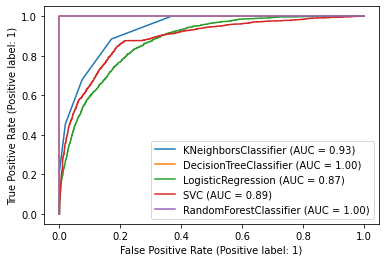

In [94]:
disp=plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(DTC,x_test,y_test,ax=disp.ax_)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

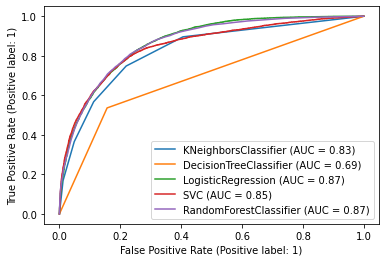

In [95]:
disp=plot_roc_curve(knn,x_train,y_train)
plot_roc_curve(DTC,x_train,y_train,ax=disp.ax_)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [96]:
auc_score = roc_auc_score(y_test,y_test)
print(auc_score)

1.0


# Tunning

the best model is Random Forest Classifier

In [110]:
params ={'n_estimators':[100,150,200,250],'criterion':['gini','entropy'],'max_depth':[13,15,16,17],'min_samples_split':[2,3,4,5,6],'bootstrap':[True,False],'n_jobs':[-1,-2,-3]}

In [111]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gcv = GridSearchCV(RandomForestClassifier(), params, cv = 5, n_jobs =-1)
gcv.fit(x_train,y_train)

In [ ]:
gcv.best_params_

In [97]:
rfc_clf=RandomForestClassifier(bootstrap = False, criterion = 'gini', max_depth = 17, min_samples_split = 2,
                                n_estimators = 200, n_jobs = -3) 
rfc_clf.fit(x_train,y_train)
pred=rfc_clf.predict(x_train)

In [98]:
rfc_clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))

print('\n==================Train Result=============')
print(f'Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%')
print('-----------------------------------------')
print(f"Classification Report:\n{rfc_clf_report}")
print('----------------------------------')
print(f"confusion matrix:\n{confusion_matrix(y_train,pred)}\n")
#******************* Test SCore**********************
pred=rfc_clf.predict(x_test)
clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print('***********test results***********')
print(f'Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%')
print('-----------------------------------------')
print(f"Classification Report:\n{clf_report}")
print('----------------------------------')
print(f"confusion matrix:\n{confusion_matrix(y_test,pred)}\n")
print('Cross validation --> ',rfc_clf_report)


==================Train Result=============
Accuracy Score:99.32%
-----------------------------------------
Classification Report:
                      0            1  accuracy     macro avg  weighted avg
precision      0.991651     0.998426  0.993238      0.995038      0.993279
recall         0.999514     0.973402  0.993238      0.986458      0.993238
f1-score       0.995567     0.985755  0.993238      0.990661      0.993209
support    18537.000000  5865.000000  0.993238  24402.000000  24402.000000
----------------------------------
confusion matrix:
[[18528     9]
 [  156  5709]]

***********test results***********
Accuracy Score:83.71%
-----------------------------------------
Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.866121     0.711953  0.837104     0.789037      0.828707
recall        0.928409     0.552178  0.837104     0.740294      0.837104
f1-score      0.896184     0.621969  0.837104     0.759076      0.8

In [99]:
print('rfc_csv --> ',rfc_csv)

rfc_csv -->  0.8506887311811461


In [100]:
print(f'Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%')

Accuracy Score:83.71%


As we can see tunning is giving less value so we will go with the normal results

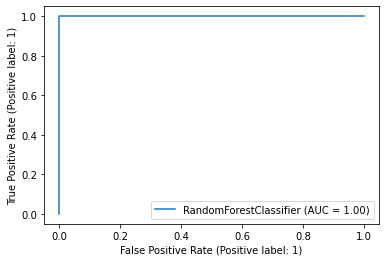

In [106]:
disp=plot_roc_curve(rfc,x_test,y_test)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [107]:
auc_score = roc_auc_score(y_test,y_test)
print(auc_score)

1.0


In [108]:
import pickle

In [109]:
pickle.dump(rfc_csv,open('Census Income Project','wb'))